### Computational photography - lab 3 - task 1

###### Filip Gromuł


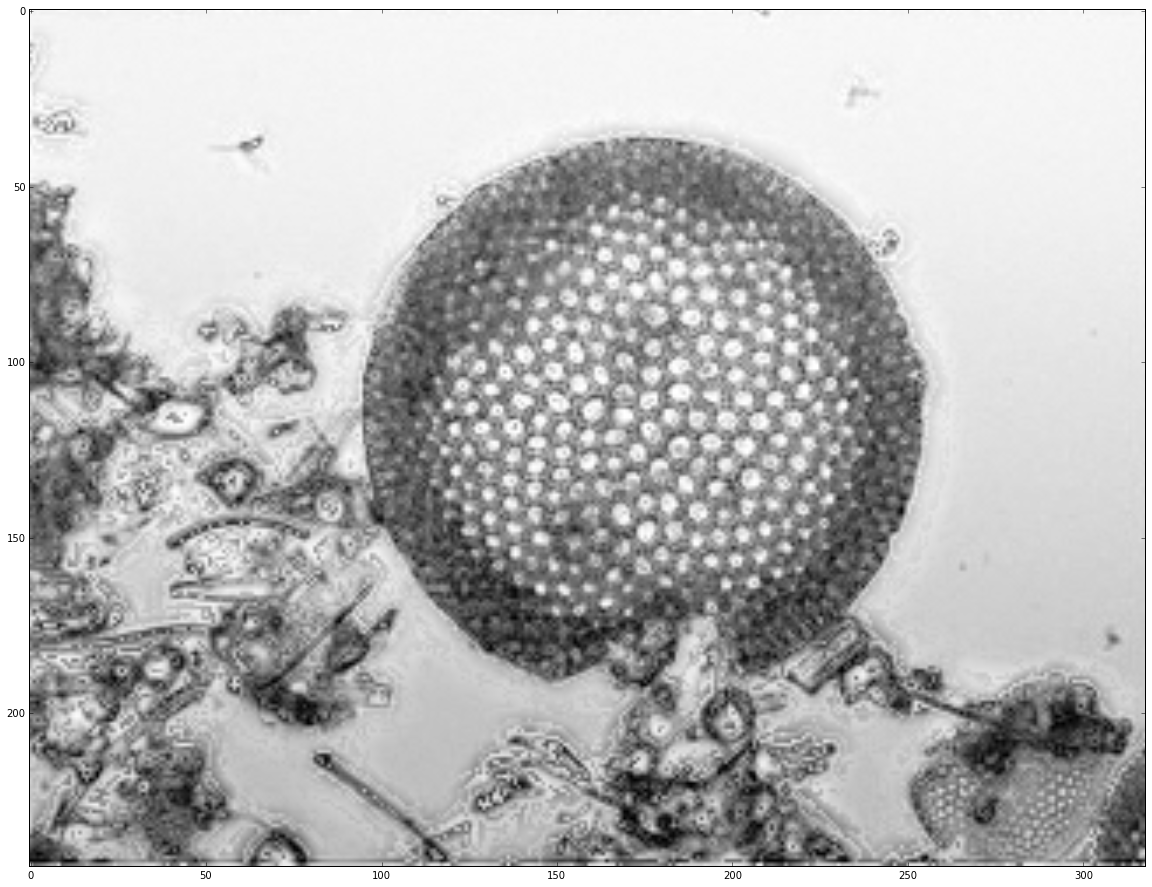

In [100]:
%matplotlib inline

import imageio
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy import ndimage

base_name = "stack"
img_count = 3
extension = "png"
image_names = [base_name + str(i) + "." + extension for i in range(1, img_count+1)]
images = [imageio.imread(name).astype(float)/255 for name in image_names]

def gradient_magnitude(image):
    h_gradient = ndimage.convolve(image, np.array([[.5, 0, -.5]]), mode='constant', cval=0.0)    
    v_gradient = ndimage.convolve(image, np.array([[.5], [0], [-.5]]), mode='constant', cval=0.0)
    return np.abs(h_gradient) + np.abs(v_gradient)

# compute magnitudes for all images
magnitudes = [gradient_magnitude(image) for image in images]

# determine which image should contribute to which pixel
contributions = []
for current_id in range(0, img_count):
    contrib = np.ones(images[0].shape, dtype=bool)
    # an image should contribute if it has the maximum gradient magnitude of all images
    for other_id in range(0, img_count):
        if current_id != other_id:
            contrib = contrib & (magnitudes[current_id] > magnitudes[other_id])
    contributions.append(contrib)

# handle the case when all images have the same gradient magnitude
all_equal = np.ones(images[0].shape, dtype=bool)
for i in range(img_count):
    all_equal = all_equal & (np.logical_not(contributions[i]))

# use the first image's data in case of same magnitudes
contributions[0] = contributions[0] | all_equal
    
# combine the images into the final image
final_image = np.zeros_like(images[0], dtype=float)
for i in range(img_count):
    final_image = final_image + contributions[i]*images[i]
       
plt.figure(figsize=(20,25))
plt.imshow(final_image, cmap = cm.Greys_r)

imageio.imwrite("sharpened.png", final_image)
    

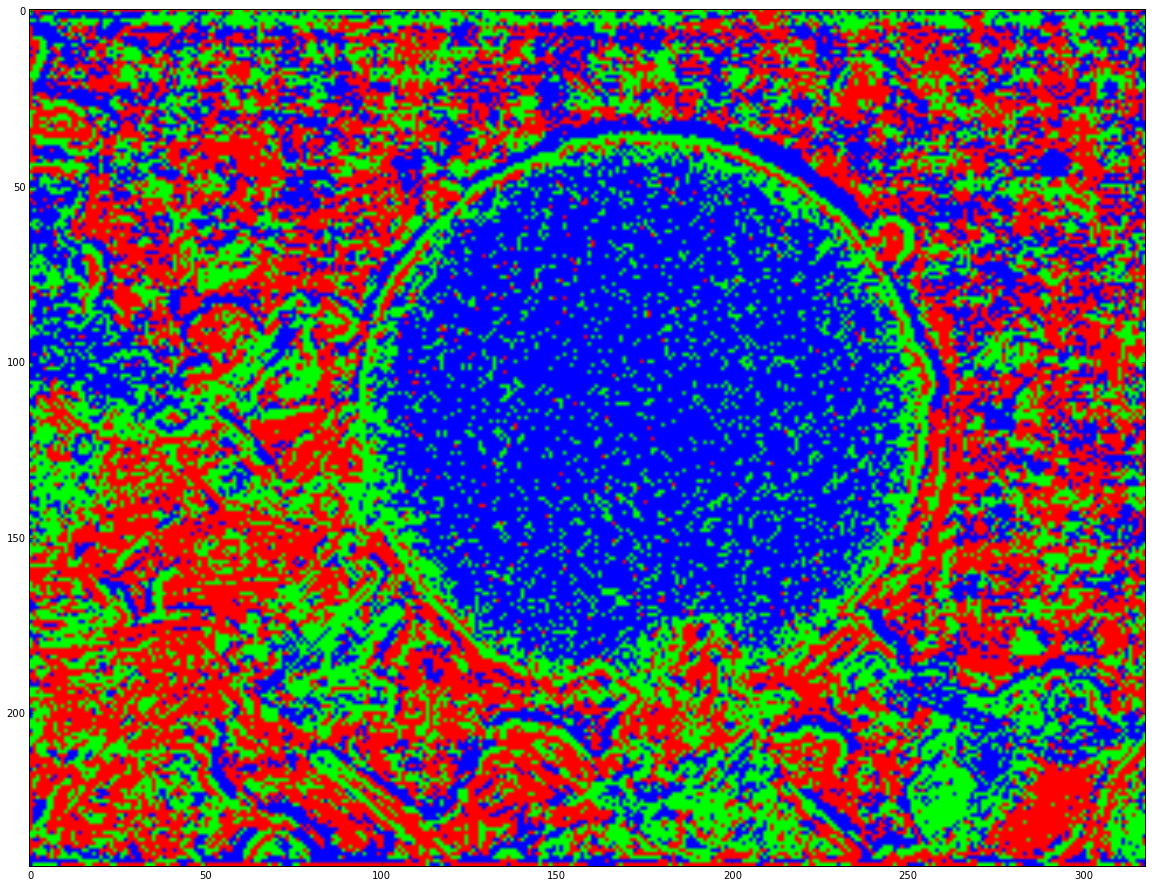

In [101]:
plt.figure(figsize=(20,25))
plt.imshow(np.dstack(contributions))